In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.dates as dates

In [16]:
### обработка даных ###

In [17]:
col_names = ['date', 'value'] # названия колонок для последующего присвоения

In [18]:
# Считывание таблицы с курсом долара, выбор колонок только с датой и значением. Затем присвоение новых имен колонкам.
money = pd.read_csv('kurs.csv', sep = ';', decimal = ',', dayfirst = True, parse_dates = [1])[['data', 'curs']]
money.columns = col_names

In [19]:
# Считывание таблицы с курсом нефти, выбор колонок только с датой и значением. Затем присвоение новых имен колонкам.
oil = pd.read_csv('oil.csv', sep = ';', decimal = ',', dayfirst = True, parse_dates = [2])[['<DATE>', '<OPEN>']]
oil.columns = col_names

In [20]:
data = pd.merge(money, oil, on = ['date']) # Совмещение двух таблиц по одинаковой дате

In [21]:
data.head(5)

,date,value_x,value_y
0,2015-06-18,53.8999,63.7400000
1,2015-06-19,53.3301,64.2000000
2,2015-06-23,53.5569,63.2100000
3,2015-06-24,54.2081,64.6900000
4,2015-06-25,54.0746,63.5000000


In [22]:
### создание модели ###

In [23]:
end = 770 # номер окончания обучающих данных

In [24]:
x = data[['value_y']][:end]   # обучающие данные на вход
y = data['value_x'][:end]     # обучающие данные на выход

In [25]:
x_test = data[['value_y']][end:]   # тестовые данные на вход
y_test = data[['value_x']][end:]   # тестовые данные на выход (для сравнения с предсказанными)

In [26]:
reg = LinearRegression().fit(x, y) # обучение модели

In [27]:
y_predicted = reg.predict(x_test) # выполнение предсказания

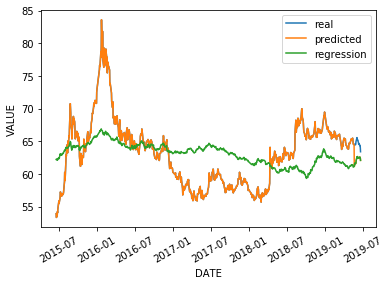

In [28]:
# визуализация:
plt.xticks(rotation = 30) # поворот опорных значений для оси Х

plt.xlabel("DATE")        # обозначение оси Х
plt.ylabel("VALUE")       # обозначение оси У

plt.plot(data['date'], data[['value_x']], label = 'real')                     # реальных данных
plt.plot(data['date'], list(y) + list(y_predicted), label = "predicted")      # реальных + предсказанных данных
plt.plot(data['date'], reg.predict(data[['value_y']]), label = "regression")  # полностью предсказанных данных

plt.legend()  #вывод графиков